In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
training_generator = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    validation_split = 0.2  # 20% of the training data will be used for validation
)

training_set = training_generator.flow_from_directory(
    'plant_disease/training_data',
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'  # Use the subset 'training' for training data
)

validation_set = training_generator.flow_from_directory(
    'plant_disease/training_data',
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'  # Use the subset 'validation' for validation data
)

test_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_generator.flow_from_directory(
    'plant_disease/test_data',
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 4333 images belonging to 4 classes.
Found 1082 images belonging to 4 classes.
Found 1212 images belonging to 4 classes.


In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 12

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add a dropout layer with a dropout rate of 0.5 (50%)
    layers.Dense(n_classes, activation='softmax'),
])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [5]:
model.build(input_shape=input_shape)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
history=model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=EPOCHS,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

Epoch 1/12
136/136 [==============================] - 191s 1s/step - loss: 1.1182 - accuracy: 0.5112 - val_loss: 0.7113 - val_accuracy: 0.7218
Epoch 2/12
136/136 [==============================] - 160s 1s/step - loss: 0.6066 - accuracy: 0.7904 - val_loss: 0.5528 - val_accuracy: 0.7902
Epoch 3/12
136/136 [==============================] - 151s 1s/step - loss: 0.4680 - accuracy: 0.8294 - val_loss: 0.3954 - val_accuracy: 0.8346
Epoch 4/12
136/136 [==============================] - 159s 1s/step - loss: 0.3932 - accuracy: 0.8539 - val_loss: 0.3191 - val_accuracy: 0.8697
Epoch 5/12
136/136 [==============================] - 151s 1s/step - loss: 0.3575 - accuracy: 0.8726 - val_loss: 0.3373 - val_accuracy: 0.8688
Epoch 6/12
136/136 [==============================] - 168s 1s/step - loss: 0.3224 - accuracy: 0.8821 - val_loss: 0.2542 - val_accuracy: 0.8974
Epoch 7/12
136/136 [==============================] - 163s 1s/step - loss: 0.2886 - accuracy: 0.9017 - val_loss: 0.2329 - val_accuracy: 0.9131

In [8]:
acc = model.evaluate(test_set)

38/38 [==============================] - 25s 656ms/step - loss: 0.2112 - accuracy: 0.9076


In [9]:
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

38/38 [==============================] - 11s 289ms/step - loss: 0.2112 - accuracy: 0.9076
Test Loss: 0.21121583878993988
Test Accuracy: 0.9075907468795776


In [10]:
 model.evaluate(training_set)

136/136 [==============================] - 50s 365ms/step - loss: 0.1131 - accuracy: 0.9568


[0.11313536018133163, 0.956842839717865]

In [11]:
import matplotlib.pyplot as plt 

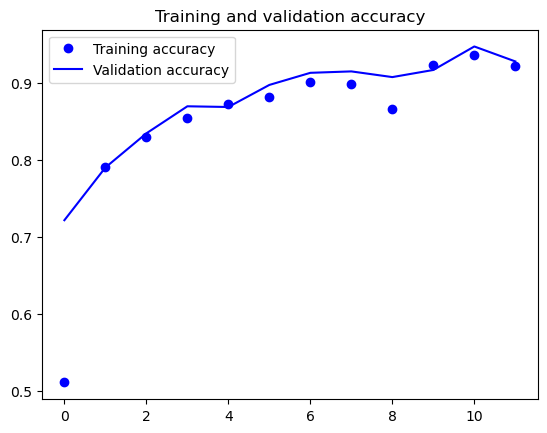

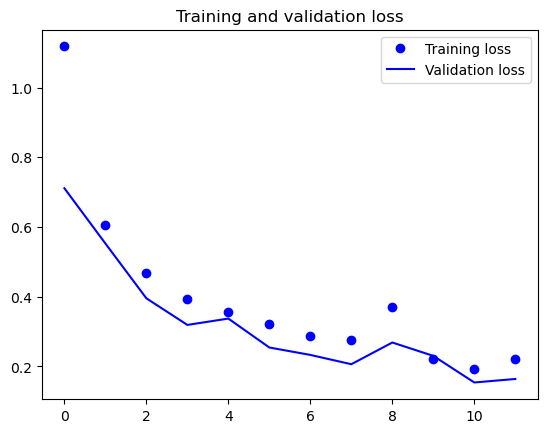

In [12]:
accuracy =  history.history['accuracy']
val_accuracy =  history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()